In [25]:
from pprint import pprint

data_file = "../Data/attacks.csv"
raw_data = sc.textFile(data_file)
header = raw_data.first() #extract header
raw_data = raw_data.filter(lambda row: row != header)

countries = {'CROATIA': 0, 'NORWAY': 0, 'FRANCE': 0, 'MARTINIQUE': 0, 'ICELAND': 0, 
            'JAVA': 1, 'Sierra Leone': 0, 'CYPRUS': 0, 'LIBERIA': 0, 'NEW BRITAIN': 1, 
            'URUGUAY': 1, 'NORTH ATLANTIC OCEAN ': 0, 'ADMIRALTY ISLANDS': 1, 
            'PAPUA NEW GUINEA': 1, 'DJIBOUTI': 0, 'TAIWAN': 1, 'EL SALVADOR': 0, 
            'ST. MAARTIN': 0, 'ASIA?': 0, 'NAMIBIA': 1, 'OCEAN': 1, 'CAPE VERDE': 0, 
            'MID ATLANTIC OCEAN': 0, 'MAURITIUS': 1, 'ANTIGUA': 0, 'FRENCH POLYNESIA': 1, 
            'JOHNSTON ISLAND': 0, 'SUDAN': 0, 'SOUTH KOREA': 0, 'TUVALU': 1, 
            'SOUTH ATLANTIC OCEAN': 1, 'UNITED ARAB EMIRATES (UAE)': 0, 'DOMINICAN REPUBLIC': 0, 
            ' PHILIPPINES': 0, 'MALAYSIA': 0, 'BRITISH VIRGIN ISLANDS': 0, 'CHINA': 0, 
            'ATLANTIC OCEAN': 0, 'ITALY': 0, 'VENEZUELA': 0, 'SOLOMON ISLANDS / VANUATU': 1, 
            'SOUTH CHINA SEA': 0, 'Between PORTUGAL & INDIA': 2, 'DIEGO GARCIA': 1, 
            'MEDITERRANEAN SEA?': 0, 'INDIAN OCEAN?': 1, 'INDIA': 0, 'SOUTH AFRICA': 1, 
            'St Helena': 1, 'WESTERN SAMOA': 1, 'TASMAN SEA': 1, 'HONG KONG': 0, 'TONGA': 1, 
            'YEMEN': 0, 'COLUMBIA': 0, 'NORTHERN MARIANA ISLANDS': 0, 'GUAM': 0, 'GUINEA': 0, 
            'CENTRAL PACIFIC': 2, 'GUATEMALA': 0, 'FIJI': 1, 'GULF OF ADEN': 0, 'JAPAN': 0, 
            'MID-PACIFC OCEAN': 0, 'ST. MARTIN': 1, 'USA': 0, 'CRETE': 0, 'BRAZIL': 1, 
            'TURKS & CAICOS': 0, 'SOUTHWEST PACIFIC OCEAN': 1, 'GREENLAND': 0, 
            'BAY OF BENGAL': 1, 'PACIFIC OCEAN': 0, 'LEBANON': 0, 'MALTA': 0, 'NIGERIA': 0, 
            'GREECE': 0, 'MEXICO': 0, 'BERMUDA': 0, 'UNITED KINGDOM': 0, 'SINGAPORE': 0, 
            'BRITISH ISLES': 0, 'TURKEY': 0, 'NEVIS': 1, 'AUSTRALIA': 1, 'ENGLAND': 0, 
            'SIERRA LEONE': 0, 'VANUATU': 1, 'NORTH SEA': 0, 'RUSSIA': 0, 'MICRONESIA': 0, 
            'PORTUGAL': 0, 'RED SEA': 0, 'MONTENEGRO': 0, 'IRAQ': 0, 'SWEDEN': 0, 
            'PERSIAN GULF': 0, 'NORTH ATLANTIC OCEAN': 0, 'Fiji': 1, 'SLOVENIA': 0, 
            'PHILIPPINES': 0, 'IRAN / IRAQ': 0, 'TUNISIA': 0, 'SAN DOMINGO': 1, 'AZORES': 0, 
            'GEORGIA': 0, 'BURMA': 0, 'NEW GUINEA': 1, 'SUDAN?': 0, 'NETHERLANDS ANTILLES': 0, 
            'ALGERIA': 0, 'NICARAGUA': 0, 'SEYCHELLES': 1, 'RED SEA?': 0, 'BRITISH NEW GUINEA': 1, 
            'THAILAND': 0, 'PALESTINIAN TERRITORIES': 0, 'FALKLAND ISLANDS': 1, 'IRELAND': 0, 
            'MONACO': 0, 'PARAGUAY': 1, 'SYRIA': 0, 'EGYPT ': 0, 'MADAGASCAR': 1, 
            'NORTH PACIFIC OCEAN': 0, 'EGYPT / ISRAEL': 0, 'COOK ISLANDS': 1, 
            'TRINIDAD & TOBAGO': 0, 'PACIFIC OCEAN ': 0, 'EQUATORIAL GUINEA / CAMEROON': 0, 
            'ISRAEL': 0, 'SAMOA': 1, 'ECUADOR': 1, 'CARIBBEAN SEA': 0, 'NEW CALEDONIA': 1, 
            'MARSHALL ISLANDS': 0, 'PANAMA': 0, 'UNITED ARAB EMIRATES': 0, 'ITALY / CROATIA': 0, 
            'NEW ZEALAND': 1, 'MALDIVE ISLANDS': 0, 'GHANA': 0, 'MOZAMBIQUE': 0, 'SRI LANKA': 0, 
            'SOLOMON ISLANDS': 1, 'Coast of AFRICA': 1, 'BARBADOS': 0, 'BANGLADESH': 0, 
            'CHILE': 1, 'CANADA': 0, 'HONDURAS': 0, 'PALAU': 0, 'AMERICAN SAMOA': 1, 
            'SAUDI ARABIA': 0, ' TONGA': 1, 'SPAIN': 0, 'ARGENTINA': 1, 'CURACAO': 0, 
            'ANDAMAN / NICOBAR ISLANDAS': 0, 'KENYA': 1, 'EGYPT': 0, 'THE BALKANS': 0, 
            'PUERTO RICO': 0, 'KIRIBATI': 0, 'OKINAWA': 0, 'REUNION': 1, 
            'BRITISH WEST INDIES': 0, 'NICARAGUA ': 0, 'FEDERATED STATES OF MICRONESIA': 0, 
            'IRAN': 0, 'CAYMAN ISLANDS': 0, 'SOMALIA': 0, 'INDONESIA': 1, 'KUWAIT': 0, 
            'Seychelles': 1, 'COSTA RICA': 0, 'INDIAN OCEAN': 1, 'CEYLON (SRI LANKA)': 0, 
            'YEMEN ': 0, 'HAITI': 0, 'SCOTLAND': 0, 'CUBA': 0, 'GUYANA': 0, 'LIBYA': 0, 
            'MEXICO ': 0, 'SENEGAL': 0, 'GRAND CAYMAN': 0, 'GABON': 1, 'GRENADA': 0, 
            'RED SEA / INDIAN OCEAN': 0, 'VIETNAM': 0, 'BAHAMAS': 0, 'BAHREIN': 0, 
            'NORTHERN ARABIAN SEA': 0, 'BELIZE': 0, 'MEDITERRANEAN SEA': 0, 'ANGOLA': 1, 
            'SOUTH PACIFIC OCEAN': 1, 'TANZANIA': 1, 'KOREA': 0, 'JAMAICA': 0, 'ARUBA': 0, 
            'MAYOTTE':1}

def add_hemisphere(line):
    elems = line.split(',')
    try:
        country = elems[4]
    except:
        country = ''
    hemi = countries.get(country)
    elems.append(hemi)
    return (elems)

raw_data = raw_data.map(add_hemisphere)
pprint(raw_data.count())

def get_season(month, day, hemi):
    m = month * 100
    if day == 0:
        d = 1
    else:
        d = day
    md = m + d
    if hemi == 0:
        if ((md >= 301) and (md <= 531)):
            s = 'spring'
        elif ((md > 531) and (md < 901)):
            s = 'summer'
        elif ((md >= 901) and (md <= 1130)):
            s = 'fall'
        elif ((md > 1130) and (md <= 229)):
            s = 'winter'
        else:
            s = 'unknown'
    else:
        if ((md >= 301) and (md <= 531)):
            s = 'fall'
        elif ((md > 531) and (md < 901)):
            s = 'winter'
        elif ((md >= 901) and (md <= 1130)):
            s = 'spring'
        elif ((md > 1130) and (md <= 229)):
            s = 'summer'
        else:
            s = 'unknown'
    return s

def add_season(line):
    date = line[0]
    year = date.split('.')[0]
    try:
        month = int(date.split('.')[1])
        day = int(date.split('.')[2])
    except:
        month = 0
        day = 0
    try:
        hemi = line[16]
    except:
        hemi = 0
    if year.startswith('00') or len(year) != 4 or month == 0:
        season = 'unknown'
    else:
        season = get_season(month,day,hemi)
    line.append(season)
    return line
season_raw_data = raw_data.map(add_season)
pprint(season_raw_data.count())



6003
6003


In [26]:
def get_by_season(line):
    try:
        tag = line[17]
    except:
        tag = 'unknown'
    return (tag, line)

by_season_data = season_raw_data.map(get_by_season)
count_by_season_data = by_season_data.countByKey()
pprint(count_by_season_data)
print(count_by_season_data.get('summer'))

defaultdict(<type 'int'>, {'unknown': 1823, 'fall': 1429, 'summer': 1303, 'winter': 383, 'spring': 1065})
1303


In [27]:
def get_by_year(line):
    try:
        tag = line[2]
    except:
        tag = '0'
    return (tag, line)

by_year_data = raw_data.map(get_by_year)
count_by_year = by_year_data.countByKey()

pprint(count_by_year)

defaultdict(<type 'int'>, {u'': 2, u'1788': 1, u'1818': 1, u'1785': 1, u'1787': 1, u'1869': 2, u'1868': 6, u'1832': 2, u'1948': 29, u'1949': 31, u'1836': 2, u'1837': 3, u'1834': 1, u'1835': 2, u'1942': 41, u'1943': 28, u'1940': 24, u'1941': 27, u'1946': 26, u'1947': 30, u'1944': 31, u'1945': 16, '0': 132, u'2015': 139, u'2014': 125, u'2016': 103, u'2011': 128, u'2010': 101, u'2013': 122, u'2012': 117, u'1918': 5, u'1791': 1, u'1955': 43, u'1954': 42, u'1957': 41, u'1956': 51, u'1951': 31, u'1950': 43, u'1953': 36, u'1952': 29, u'1555': 1, u'1959': 93, u'1958': 54, u'1554': 1, u'1700': 3, u'1703': 1, u'1829': 2, u'1828': 2, u'1825': 2, u'1827': 4, u'1826': 3, u'52': 1, u'1870': 8, u'1811': 1, u'1871': 8, u'1920': 15, u'1921': 11, u'1922': 22, u'1923': 21, u'1924': 19, u'1925': 14, u'1926': 21, u'1927': 19, u'1928': 26, u'1929': 37, u'1822': 1, u'1858': 4, u'1859': 1, u'1850': 1, u'1851': 3, u'1852': 10, u'1853': 7, u'1854': 1, u'1855': 7, u'1856': 4, u'1878': 12, u'1879': 8, u'1738': 1,

In [28]:
def fix_country_name(country):
    if country == 'INDIAN OCEAN':
        country = 'INDIA'
    elif country == 'REUNION':
        country = 'MADAGASCAR'
    elif country == 'FRENCH POLYNESIA':
        country = 'SAMOA'
    elif country == 'NEW BRITAIN':
        country = 'PAPUA NEW GUINEA'
    elif country == 'NEW GUINEA':
        country = 'PAPUA NEW GUINEA'
    elif country == 'UNITED ARAB EMIRATES (UAE)':
        country = 'UNITED ARAB EMIRATES'
    elif country == 'EGYPT ':
        country = 'EGYPT'
    elif country == 'SCOTLAND':
        country = 'UNITED KINGDOM'
    elif country == 'OKINAWA':
        country = 'JAPAN'
    elif country == 'AZORES':
        country = 'PORTUGAL'
    elif country == 'GUAM':
        country = 'United States'
    elif country == 'USA':
        country = 'United States'
    elif country == 'AMERICAN SAMOA':
        country = 'SAMOA'
    elif country == 'TRINIDAD & TOBAGO':
        country = 'TRINIDAD AND TOBAGO'
    return country.lower()

def get_by_country(line):
    try:
        tag = line[4]
    except:
        tag = 'unknown'
    tag = fix_country_name(tag)
    return (tag, line)

by_country_data = raw_data.map(get_by_country)
count_by_country = by_country_data.countByKey()

print(count_by_country)

defaultdict(<type 'int'>, {u'': 43, u'british new guinea': 1, u'pacific ocean': 17, u'cook islands': 1, u'cayman islands': 2, u'senegal': 11, u'crete': 2, u'japan': 38, u'taiwan': 9, u'cyprus': 1, u'barbados': 5, u'british west indies': 1, u'micronesia': 3, 'united kingdom': 18, u'egypt': 38, u'aruba': 1, u'puerto rico': 1, u'argentina': 1, u'norway': 2, u'sierra leone': 9, u'england': 19, u'ghana': 1, u'gulf of aden': 1, u'st. maartin': 1, u'australia': 1279, u'asia?': 1, u'cuba': 42, u'persian gulf': 4, u'st. martin': 1, u'tasman sea': 1, u'solomon islands / vanuatu': 1, u'haiti': 3, u'liberia': 3, u'coast of africa': 1, u'philippines': 59, u'red sea?': 1, u'djibouti': 1, u'red sea': 1, u'namibia': 2, u'sri lanka': 13, u'jamaica': 23, u'greenland': 1, 'samoa': 32, u'st helena': 1, u'lebanon': 3, u'malaysia': 4, u'korea': 1, u'mozambique': 44, u'greece': 25, u'nicaragua': 6, u'brazil': 102, u'palau': 5, u'curacao': 1, u'sudan': 4, u'guinea': 3, u'panama': 32, u'bahrein': 1, u'mediterr

In [29]:
def clean_year_column(line):
    try:
        tag = line[2]
    except:
        line.append('0')
    return line

def count_country_by_year(raw_data, year):
    raw_data = raw_data.map(clean_year_column)
    data_by_year = raw_data.filter(lambda x: x[2] == str(year))
    by_country_data = data_by_year.map(get_by_country)
    count_by_country = by_country_data.countByKey()
    return count_by_country

temp = count_country_by_year(raw_data, 2000)
pprint(temp)

defaultdict(<type 'int'>, {u'canada': 1, u' tonga': 1, 'madagascar': 2, u'australia': 18, u'england': 1, u'south africa': 5, u'tanzania': 5, u'new caledonia': 2, u'papua new guinea': 3, 'united states': 52, 'japan': 1, u'thailand': 1, u'new zealand': 4, u'fiji': 1})


In [30]:
def get_by_activity(line):
    try:
        activity = line[7]
    except:
        activity = 'unknown'
    return (activity, line)

by_activity_data = raw_data.map(get_by_activity)
count_by_activity = by_activity_data.countByKey()


pprint(count_by_activity)

defaultdict(<type 'int'>, {u'': 527, u'Knocked overboard': 2, u'Exercising his dog in the shallows': 1, u'Probabable drowning': 1, u'Surfing & filming dolphins': 1, u'Hurricane & Tidal Wave': 1, u'Swimming near life raft': 1, u'Small vessel with 13 men on board capsized crossing the bar and 6 men drowned.  The 7 survivors were swimming to shore': 1, u"63' fishing boat Sno' Bay foundered": 1, u'Surfing on air mattress': 1, u'Dived overboard & was swimming near stern of trawler': 1, u'Diving for sponges': 3, u'Washed off catamaran in the surf': 1, u'Trying to catch a wounded bird': 1, u'Attempting to set underwater endurance record': 1, u'Swimming (lead swimmer in race)': 1, u'3 men & 2 boys picked up wearing life jackets and with inner tube': 1, u'Wind surfing': 1, u'Lost his footing & fell overboard': 1, u'SS Ethel Skakel foundered in Central America Hurricane of 1941': 1, u'Spearfishing; shot shark; hauled it onto boat': 1, u'Killing a shark': 1, u'Free diving for abalone (surfacing)'

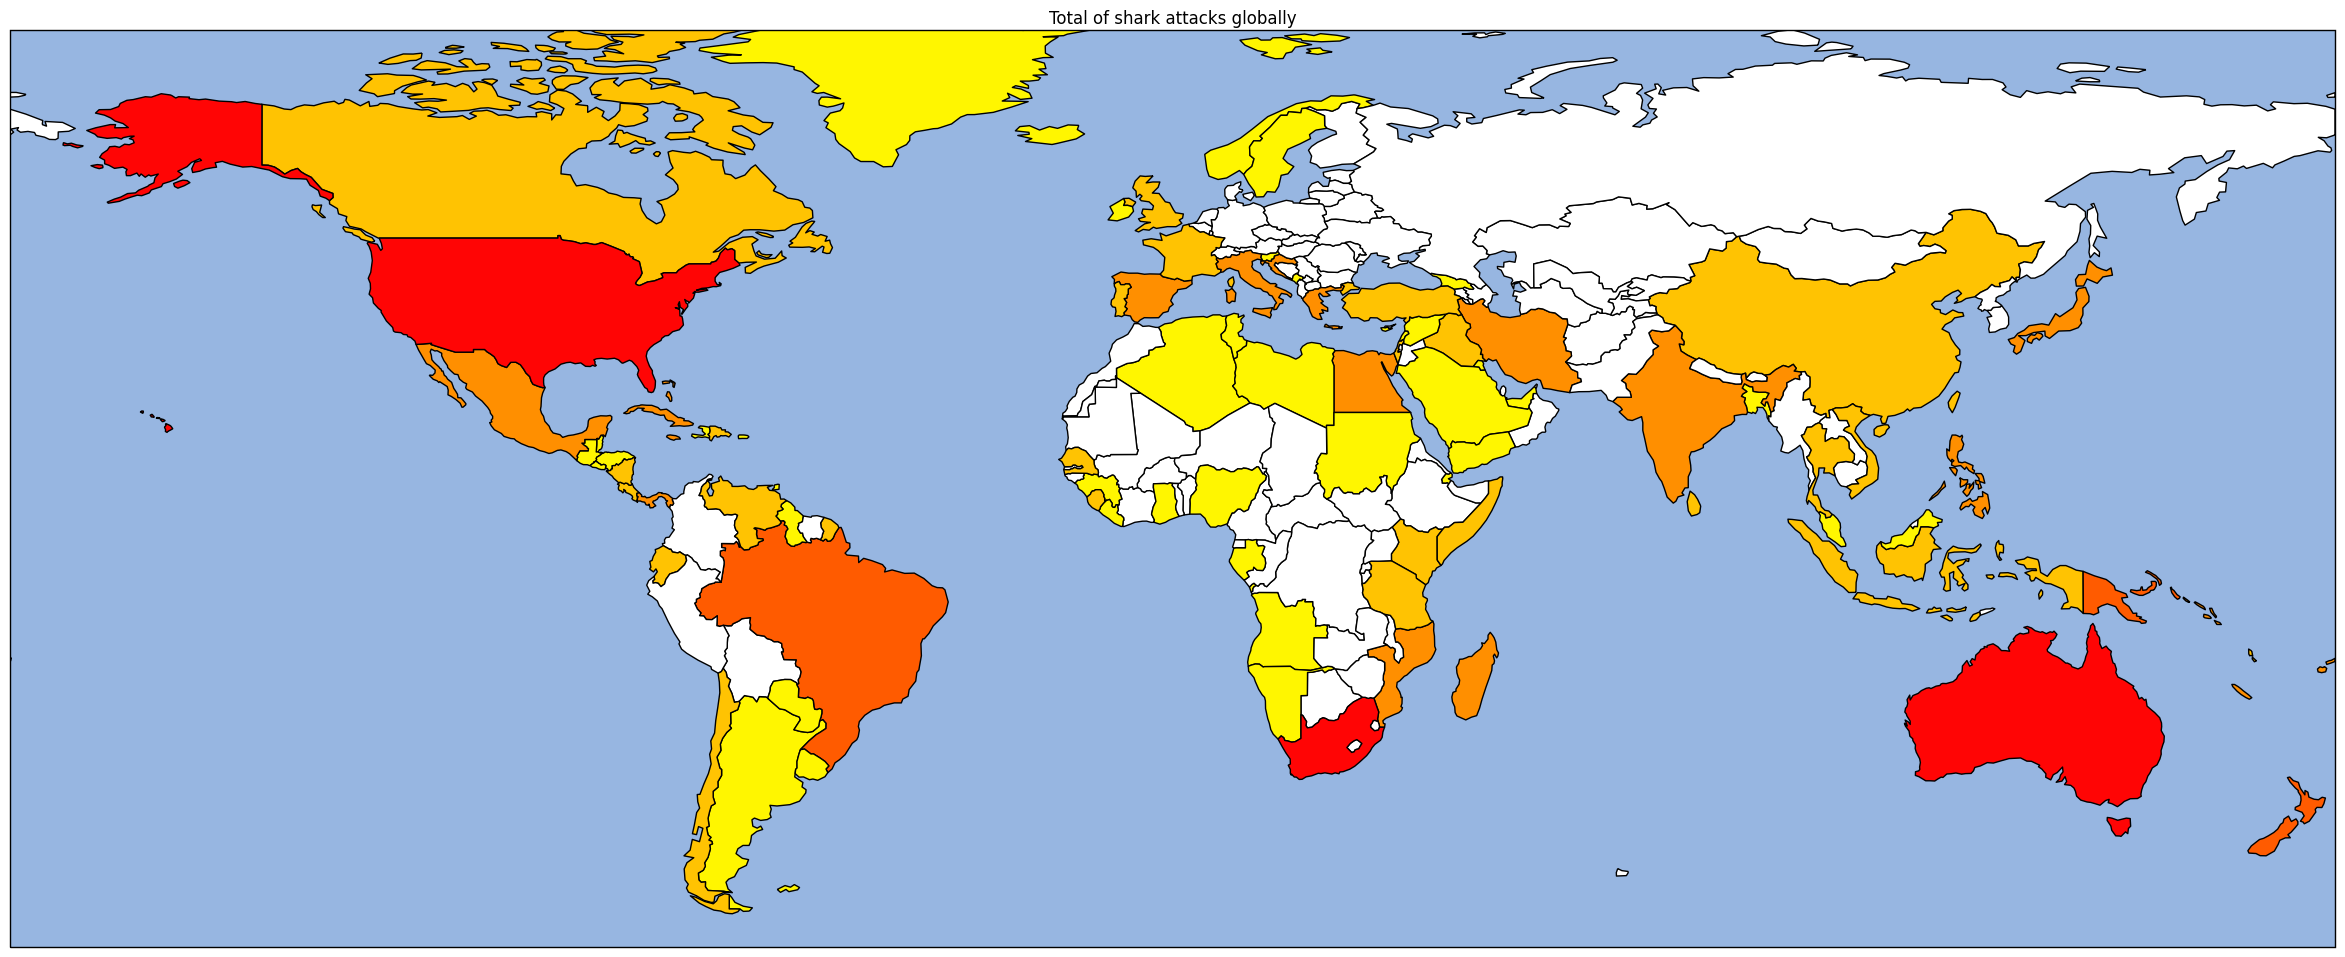

In [31]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

# Increase size of map BEFORE Basemap()!!
plt.figure(figsize=(30,18))


ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

#All attacks per country since beginning of data

for c in countries:
    temp = count_by_country.get(c.attributes['name_long'].lower(), False)
    # Loop thingy
    if temp:
        # 1 - 5
        if 0 <= temp and temp < 6:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#fff600'))
        # 6 - 20
        elif 6 <= temp and temp < 21:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ffc302'))
        # 21 - 100
        elif 21 <= temp and temp < 101:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff8f00'))
        # 101 - 500
        elif 101 <= temp and temp < 501:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff5b00'))
        # > 500
        elif 501 <= temp:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff0505'))
    else:
        ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('white'))

plt.title("Total of shark attacks globally")
plt.show()


In [18]:
#All attacks per country since beginning of data

for c in countries:
    temp = count_by_country.get(c.attributes['name_long'].lower(), False)
    # Loop thingy
    if temp:
        # 1 - 5
        if 0 <= temp and temp < 6:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#fff600'))
        # 6 - 20
        elif 6 <= temp and temp < 21:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ffc302'))
        # 21 - 100
        elif 21 <= temp and temp < 101:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff8f00'))
        # 101 - 500
        elif 101 <= temp and temp < 501:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff5b00'))
        # > 500
        elif 501 <= temp:
            ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('#ff0505'))
    else:
        ax.add_geometries(c.geometry, ccrs.PlateCarree(), facecolor=('white'))

plt.title("Total of shark attacks globally")
plt.show()

In [ ]:
#PERCENTAGE OF FATALITY

for c in countries:
    temp = cnt_b_cntry.get(c.attributes['name_long'].lower(), false)
    # Loop thingy
    if temp:
        # low
        if 0 <= temp and temp < 6:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#0042e8'))
        # low medium
        else if 6 <= temp and temp < 21:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#3ce800'))
        # medium high
        else if 21 <= temp and temp < 101:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#f7e901'))
        # high
        else if 101 <= temp and temp < 501:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('#ef8700'))
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=('white'))

plt.title("Percentage of fatal attacks")
plt.show()